In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Input
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [2]:
train =ImageDataGenerator(rescale=1/255)
validation =ImageDataGenerator(rescale=1/255)

In [3]:
train_dataset =train.flow_from_directory("Dataset\\train\\",
                                         target_size=(224,224)
                                         ,batch_size=32,
                                        class_mode='categorical')
Validation_dataset =validation.flow_from_directory("Dataset\\test\\",
                                         target_size=(224,224)
                                         ,batch_size=32,
                                        class_mode='categorical')

Found 11180 images belonging to 5 classes.
Found 1519 images belonging to 5 classes.


In [6]:
mobilenet_v2 = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

In [7]:
mobile_net_layers = hub.KerasLayer(mobilenet_v2, input_shape=(224,224,3))

OSError: SavedModel file does not exist at: C:\Users\Super\AppData\Local\Temp\tfhub_modules\145bb06ec3b59b08fb564ab752bd5aa222bfb50a\{saved_model.pbtxt|saved_model.pb}

In [8]:
mobile_net_layers.trainable = False

In [26]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(220,
                                  220,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [35]:
neural_net = tf.keras.Sequential([
  
    mobile_net_layers,
                              
                                 
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(5,activation='softmax')
])

In [31]:
neural_net.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 sequential_1 (Sequential)   (None, 220, 220, 3)       0         
                                                                 
 dropout_4 (Dropout)         (None, 1280)              0         
                                                                 
 dense_4 (Dense)             (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [36]:
neural_net.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              loss='categorical_crossentropy',metrics=['accuracy'])

In [37]:
model_fit=neural_net.fit(
    train_dataset,
    validation_data=Validation_dataset,
    epochs=10)

Epoch 1/10
350/350 [==============================] - 329s 932ms/step - loss: 0.3302 - accuracy: 0.8720 - val_loss: 1.4691 - val_accuracy: 0.6899
Epoch 2/10
350/350 [==============================] - 324s 927ms/step - loss: 0.1934 - accuracy: 0.9257 - val_loss: 1.4435 - val_accuracy: 0.7051
Epoch 3/10
350/350 [==============================] - 334s 954ms/step - loss: 0.1596 - accuracy: 0.9383 - val_loss: 1.3693 - val_accuracy: 0.7261
Epoch 4/10
350/350 [==============================] - 325s 927ms/step - loss: 0.1525 - accuracy: 0.9438 - val_loss: 1.5695 - val_accuracy: 0.7143
Epoch 5/10
350/350 [==============================] - 324s 926ms/step - loss: 0.1480 - accuracy: 0.9441 - val_loss: 1.7684 - val_accuracy: 0.7255
Epoch 6/10
350/350 [==============================] - 325s 930ms/step - loss: 0.1409 - accuracy: 0.9462 - val_loss: 1.8446 - val_accuracy: 0.7163
Epoch 7/10
350/350 [==============================] - 325s 928ms/step - loss: 0.1340 - accuracy: 0.9519 - val_loss: 1.7340 -

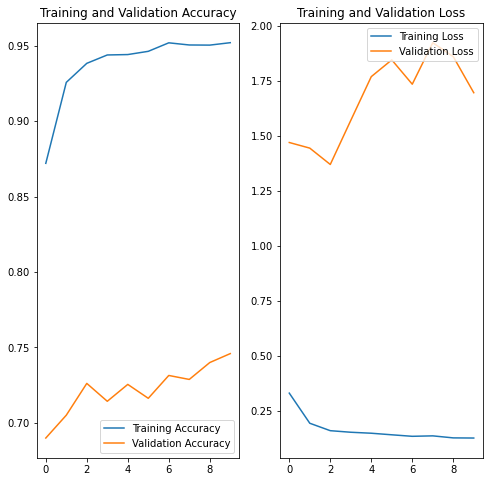

In [38]:
acc = model_fit.history['accuracy']
val_acc = model_fit.history['val_accuracy']

loss = model_fit.history['loss']
val_loss = model_fit.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [11]:
print("[INFO] saving mask detector model...")
neural_net.save("mask_MobileNet_detector.model", save_format="h5")

[INFO] saving mask detector model...
